## PART - 1. Importing

**Importing Libraries**

In [98]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings #to remove warning from the notebook
warnings.filterwarnings(action='ignore')

**Importing Dataset**

In [99]:
from sklearn.datasets import load_boston
boston = load_boston()
print (boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [100]:
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [101]:
df = pd.DataFrame(data = np.c_[boston.data, boston.target], columns = np.append(boston.feature_names, 'Price'))
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## PART - 2. Data Preprocessing

**Missing Values**

In [103]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

Inference - There are **no missing values** and all features are of **numerical data type**.

**Correlation Plot**

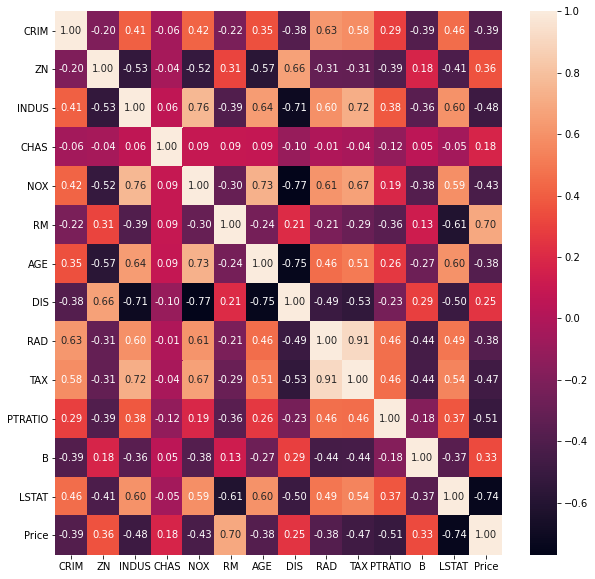

In [50]:
f = plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

In [51]:
##To know the most correlated feature to Target Variable
corr_mat = df.corr()
corr_mat['Price'].sort_values(ascending = False)

Price      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: Price, dtype: float64

**Observation:**

- The highly correlated variables are - RM (positively) and INDUS, LSTAT, TAX, PTRATIO



 - Further observing, we see that, INDUS is also highly correlated with TAX, LSTAT --> Leading to **Multicollinearity**, hence we are excluding INDUS


---


**Conclusion:**


- The features considered to predict PRICE are: RM, TAX, PTRATIO, LSTAT








In [112]:
df1 = df[['RM', 'TAX', 'PTRATIO', 'LSTAT', 'Price']]
df1.head()

,RM,TAX,PTRATIO,LSTAT,Price
0,6.575,296.0,15.3,4.98,24.0
1,6.421,242.0,17.8,9.14,21.6
2,7.185,242.0,17.8,4.03,34.7
3,6.998,222.0,18.7,2.94,33.4
4,7.147,222.0,18.7,5.33,36.2


<Figure size 288x288 with 0 Axes>

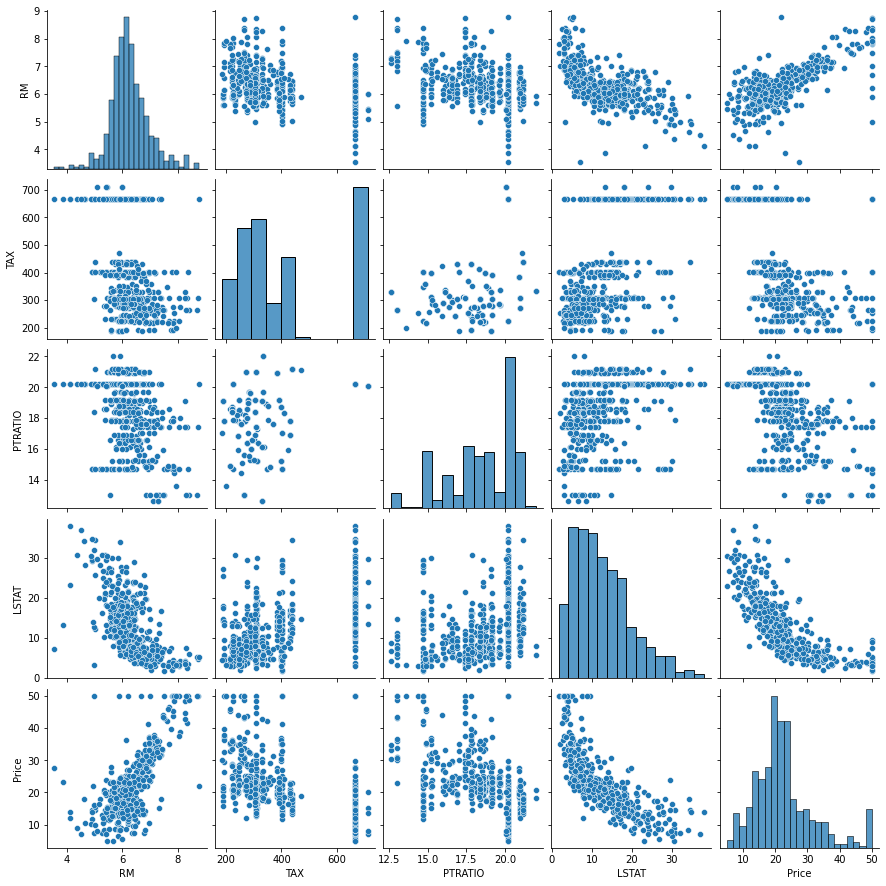

In [53]:
plt.figure(figsize = (4,4))
sns.pairplot(df1)

**Observation:**


> 
*   RM and LSTAT has good correlation with Price.
*   RM, LSTAT, Price seem to be normally distributed
*   There seems to be presence of outliers







In [105]:
desc = df1.describe().round(2)
desc

,RM,TAX,PTRATIO,LSTAT,Price
count,506.00,506.00,506.00,506.00,506.00
mean,6.28,408.24,18.46,12.65,22.53
std,0.70,168.54,2.16,7.14,9.20
min,3.56,187.00,12.60,1.73,5.00
25%,5.89,279.00,17.40,6.95,17.02
50%,6.21,330.00,19.05,11.36,21.20
75%,6.62,666.00,20.20,16.96,25.00
max,8.78,711.00,22.00,37.97,50.00


**Observation:**

- Max value in Price and LSTAT are much higher than 75% of data points, which is kind of alarming situtaion for me.


---
**Conclusion:**

- Study them and search for outliers.








## Univariate Analysis

**PRICE - Target Feature**

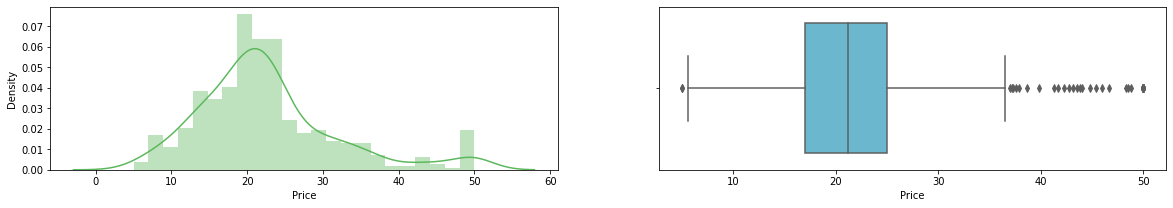

In [106]:
plt.figure(figsize = (20,3))
plt.subplot(1, 2, 1)
sns.distplot(df1['Price'], color = '#5cb85c')

plt.subplot(1, 2, 2)
sns.boxplot(df1['Price'], color = '#5bc0de')

**Observations:**


*   It is normally distributes
*   It has outliers


---


**To Do:**
 

1.   find IQR = Q3 - Q1
2. **(Q3 + 1.5 * IQR) < Outliers < (Q1 - 1.5 * IQR)**














In [107]:
# using 'desc' above

q1 = desc['Price']['25%']
q3 = desc['Price']['75%']
iqr = q3 - q1

lw = q1 - (1.5 * iqr) #Lower Whisker
uw = q3 + (1.5 * iqr) #Upper Whisker

df1[ df1['Price'] < lw ]

,RM,TAX,PTRATIO,LSTAT,Price
398,5.453,666.0,20.2,30.59,5.0
405,5.683,666.0,20.2,22.98,5.0


**Observation:**
  
*   RM dirrectly correlated to Price & ('TAX', 'PTRATIO', 'LSTAT') are negatively correlated. Hence for Price = 5.0, we have high TAX , LSTAT.



---
**Decision:**

*   It is meaningful to have these datapoints.







In [108]:
df1[ df1['Price'] > uw ].sort_values(by = ['Price', 'RM'])

,RM,TAX,PTRATIO,LSTAT,Price
190,6.951,398.0,15.2,5.10,37.0
179,6.980,193.0,17.8,5.04,37.2
291,7.148,245.0,19.2,3.56,37.3
226,8.040,307.0,17.4,3.13,37.6
182,7.155,193.0,17.8,4.82,37.9
97,8.069,276.0,18.0,4.21,38.7
180,7.765,193.0,17.8,7.56,39.8
157,6.943,403.0,14.7,4.59,41.3
232,8.337,307.0,17.4,2.47,41.7
202,7.610,348.0,14.7,3.11,42.3


**Observation:**


*   Price = 50.0 seem to have disturbing varying values for all columns

**Decision:**

*   Drop observations with Price = 50.0



In [113]:
df2 = df1.drop(index = df1[df1['Price'] == 50.0].index)
#df1[df1['Price'] == 50.0] output - dataframe with index where 'Price' == 50.0, 
#df1[df1['Price'] == 50.0].index - outputs list of indices  

**TAX**

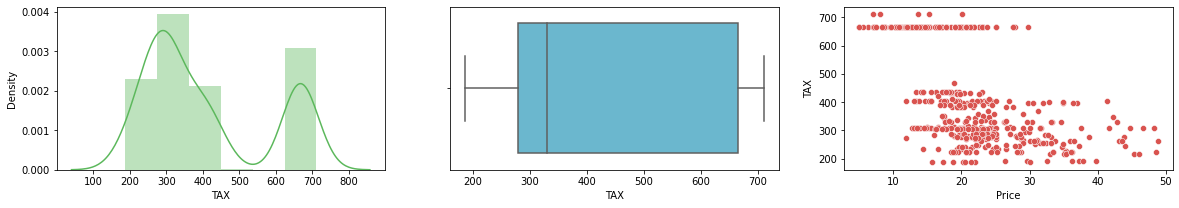

In [114]:
plt.figure(figsize = (20,3))
plt.subplot(1, 3, 1)
sns.distplot(df2['TAX'], color = '#5cb85c')

plt.subplot(1, 3, 2)
sns.boxplot(df2['TAX'], color = '#5bc0de')

plt.subplot(1, 3, 3)
sns.scatterplot(x = df2['Price'], y = df2['TAX'], color = '#d9534f')

**Observation:**


*   Not normally distributed
*   Though BoxPlot doesn't show outliers, ScatterPlot shows outliers above 600.


---
**Decision:**


*   Deep dive to analyse more and Handle the outliers.







In [115]:
tax_df = df2[df2['TAX'] > 600].sort_values(by = 'TAX')
tax_df

,RM,TAX,PTRATIO,LSTAT,Price
356,6.212,666.0,20.2,17.60,17.8
455,6.525,666.0,20.2,18.13,14.1
454,6.728,666.0,20.2,18.71,14.9
453,7.393,666.0,20.2,16.74,17.8
452,6.297,666.0,20.2,17.27,16.1
...,...,...,...,...,...
491,5.983,711.0,20.1,18.07,13.6
488,5.454,711.0,20.1,18.06,15.2
489,5.414,711.0,20.1,23.97,7.0
490,5.093,711.0,20.1,29.68,8.1


In [77]:
tax_df.describe().round(2)

,RM,TAX,PTRATIO,LSTAT,Price
count,132.00,132.00,132.00,132.00,132.00
mean,6.00,667.70,20.20,19.17,14.99
std,0.71,8.62,0.02,6.48,5.41
min,3.56,666.00,20.10,5.29,5.00
25%,5.67,666.00,20.20,14.65,10.90
50%,6.14,666.00,20.20,18.10,14.10
75%,6.41,666.00,20.20,23.28,19.20
max,8.78,711.00,20.20,37.97,29.80


**Observation:**

By seeing min and max range:

*   RM ranges from 3.56 - 8.78

*   LSTAT ranges from 5.29 - 37.97
*   TAX values mode is 666


*   PTRATIO values lies mostly in 20.0


---
**Decision:**


*   PTRATIO doesn't have a good range, choosing LSTAT which has direct correlation with TAX --  making intervals in LSTAT, calculating the mean TAX w.r.t LSTAT intervals in df1, and imputing TAX w.r.t LSTAT intervals in df1 for the outlier TAX values(found in tax_df)




---

**To Do:**


```
Intervals:
The actual LSTAT range [1.73 - 37.97]
so dividing - [0 - 10], [10 - 20], [20 - 30], [30 < ]

Replacing:
Interval 1: TAX_10 -> Replacing extreme TAX values having LSTAT is between 0 to 10 with mean of other TAX values whose LSTAT is between 0 to 10.
Interval 2: TAX_20 -> Replacing extreme TAX values having LSTAT is between 10 to 20 with mean of other TAX values whose LSTAT is between 10 to 20.
Interval 3: TAX_30 -> Replacing extreme TAX values having LSTAT is between 20 to 30 with mean of other TAX values whose LSTAT is between 20 to 30.
Interval 4: TAX_40 -> Replacing extreme TAX values having LSTAT >= 30 with mean of other TAX values whose LSTAT >= 30.

The Non-Extreme Tax value is mentioned as - df1['TAX] < 600

```





In [117]:
Tax_10 = df2.loc[(df2['TAX'] < 600) &(df2['LSTAT'] > 0.0) & (df2['LSTAT'] <= 10.0), 'TAX'].mean()
Tax_20 = df2.loc[(df2['TAX'] < 600) &(df2['LSTAT'] > 10.0) & (df2['LSTAT'] <= 20.0), 'TAX'].mean()
Tax_30 = df2.loc[(df2['TAX'] < 600) &(df2['LSTAT'] > 20.0) & (df2['LSTAT'] <= 30.0), 'TAX'].mean()
Tax_g30 = df2.loc[(df2['TAX'] < 600) &(df2['LSTAT'] > 30.0), 'TAX'].mean()

df2.loc[(df2['TAX'] > 600) &(df2['LSTAT'] > 0.0) & (df2['LSTAT'] <= 10.0), 'TAX'] = Tax_10
df2.loc[(df2['TAX'] > 600) &(df2['LSTAT'] > 10.0) & (df2['LSTAT'] <= 20.0), 'TAX'] = Tax_20
df2.loc[(df2['TAX'] > 600) &(df2['LSTAT'] > 20.0) & (df2['LSTAT'] <= 30.0), 'TAX'] = Tax_30
df2.loc[(df2['TAX'] > 600) &(df2['LSTAT'] > 30.0), 'TAX'] = Tax_g30

df2[df2['TAX'] > 600]['TAX'].count()

0

Values successfully imputed!

Text(0.5, 1.0, 'TAX distribution after imputing extreme values')

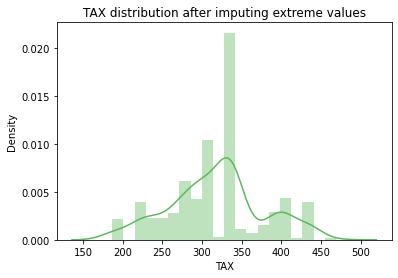

In [118]:
sns.distplot(df2['TAX'], color = '#5cb85c' )
plt.title('TAX distribution after imputing extreme values')

Looks normal now!

**LSTAT**

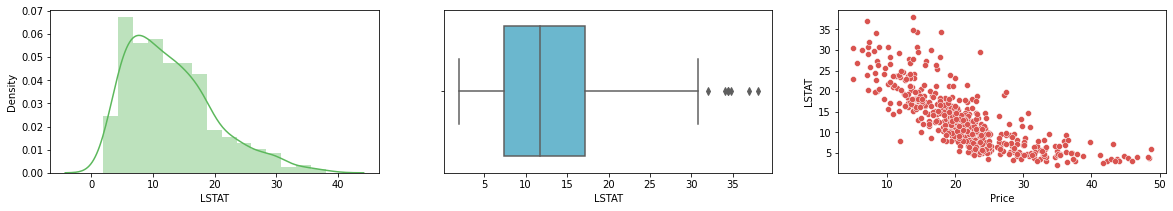

In [119]:
plt.figure(figsize = (20,3))
plt.subplot(1, 3, 1)
sns.distplot(df2['LSTAT'], color = '#5cb85c')

plt.subplot(1, 3, 2)
sns.boxplot(df2['LSTAT'], color = '#5bc0de')

plt.subplot(1, 3, 3)
sns.scatterplot(x = df2['Price'], y = df2['LSTAT'], color = '#d9534f')

**Observation:**


*   Skewed to right - indicates outliers.
*   Presence of outliers(aboove Upper Whisker) in boxplot.



In [120]:
# using 'desc' above

q1 = desc['LSTAT']['25%']
q3 = desc['LSTAT']['75%']
iqr = q3 - q1

lw = q1 - (1.5 * iqr) #Lower Whisker
uw = q3 + (1.5 * iqr) #Upper Whisker

df2[ df2['LSTAT'] > uw ].sort_values(by = 'LSTAT')

,RM,TAX,PTRATIO,LSTAT,Price
387,5.000,335.0,20.2,31.99,7.4
438,5.935,335.0,20.2,34.02,8.4
412,4.628,335.0,20.2,34.37,17.9
141,5.019,437.0,21.2,34.41,14.4
373,4.906,335.0,20.2,34.77,13.8
414,4.519,335.0,20.2,36.98,7.0
374,4.138,335.0,20.2,37.97,13.8


**Observation:**


*   LSAT value for these 7 houses is high resulting in low MEDV, which follows the negative correaltion and is True.

*   RM is low and TAX is little higher which means low MEDV and which is True.


---
**Decision:**



*   The datapoints are acceptable









**PTRATIO**

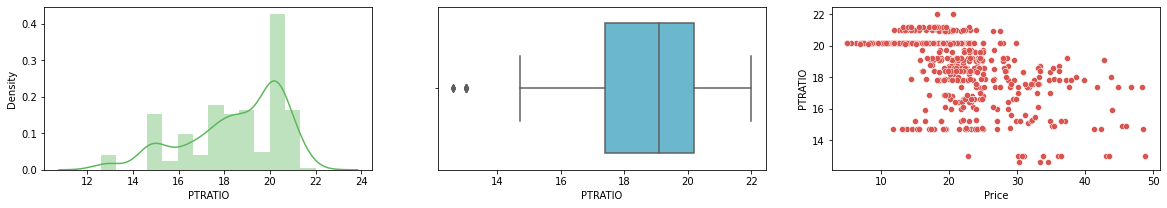

In [121]:
plt.figure(figsize = (20,3))
plt.subplot(1, 3, 1)
sns.distplot(df2['PTRATIO'], color = '#5cb85c')

plt.subplot(1, 3, 2)
sns.boxplot(df2['PTRATIO'], color = '#5bc0de')

plt.subplot(1, 3, 3)
sns.scatterplot(x = df2['Price'], y = df2['PTRATIO'], color = '#d9534f')

In [123]:
#we can clearly see that Lower Whisker lies before 14. Hence no need to find Lower Whisker seperately as did before.
df2[ df2['PTRATIO'] < 14 ].sort_values(by = 'PTRATIO')

,RM,TAX,PTRATIO,LSTAT,Price
196,7.287,329.0,12.6,4.08,33.3
197,7.107,329.0,12.6,8.61,30.3
198,7.274,329.0,12.6,6.62,34.6
258,7.333,264.0,13.0,7.79,36.0
259,6.842,264.0,13.0,6.90,30.1
260,7.203,264.0,13.0,9.59,33.8
261,7.520,264.0,13.0,7.26,43.1
262,8.398,264.0,13.0,5.91,48.8
263,7.327,264.0,13.0,11.25,31.0
264,7.206,264.0,13.0,8.10,36.5


**Observation:**
* PTRATIO for all above data points is same.
* RM and MEDV is increasing simultaneously, as RM and MEDV are positively correlated, which is fine.
* As LSTAT increases MEDV decreases, which follows negative correlation.


---


**Conclusion:**

* No unusual behaviour is observed for these data points. Therefore, we can keep them.

**RM**

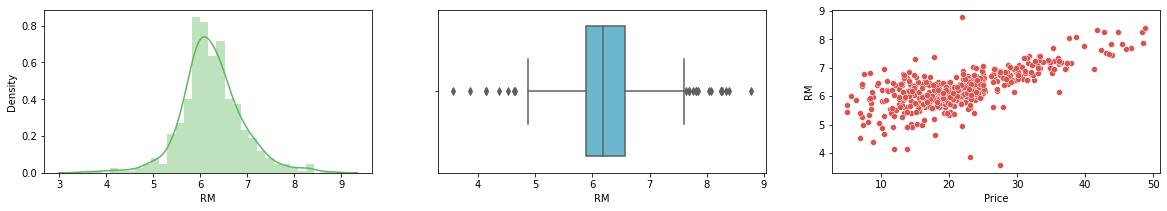

In [124]:
plt.figure(figsize = (20,3))
plt.subplot(1, 3, 1)
sns.distplot(df2['RM'], color = '#5cb85c')

plt.subplot(1, 3, 2)
sns.boxplot(df2['RM'], color = '#5bc0de')

plt.subplot(1, 3, 3)
sns.scatterplot(x = df2['Price'], y = df2['RM'], color = '#d9534f')

In [125]:
# using 'desc' above

q1 = desc['RM']['25%']
q3 = desc['RM']['75%']
iqr = q3 - q1

lw = q1 - (1.5 * iqr) #Lower Whisker
uw = q3 + (1.5 * iqr) #Upper Whisker

df2[ df2['RM'] < lw ].sort_values(by = 'RM')

,RM,TAX,PTRATIO,LSTAT,Price
365,3.561,293.914141,20.2,7.12,27.5
367,3.863,334.330882,20.2,13.33,23.1
374,4.138,335.000000,20.2,37.97,13.8
406,4.138,338.636364,20.2,23.34,11.9
384,4.368,335.000000,20.2,30.63,8.8
414,4.519,335.000000,20.2,36.98,7.0
412,4.628,335.000000,20.2,34.37,17.9
386,4.652,338.636364,20.2,28.28,10.5


**Observation:**


*   Two data points (row index - 365 & 367) where MEDV is higher while RM is very low, though RM and MEDV are positively correlated.
*   Also for these two data points TAX and PTRATIO are above 50% of data points respectively, though both are negatively correlated to MEDV.
* Rest data points, no any unusual behaviour.


---
**Decision:**
* Remove observation with row index - 365 & 367





In [126]:
df2.drop(index = [365, 367], inplace = True)

In [127]:
df2[ df2['RM'] > uw ].sort_values(by = 'RM')

,RM,TAX,PTRATIO,LSTAT,Price
180,7.765,193.000000,17.8,7.56,39.8
98,7.820,276.000000,18.0,3.57,43.8
280,7.820,216.000000,14.9,3.76,45.4
203,7.853,224.000000,14.7,3.81,48.5
226,8.040,307.000000,17.4,3.13,37.6
97,8.069,276.000000,18.0,4.21,38.7
233,8.247,307.000000,17.4,3.95,48.3
253,8.259,330.000000,19.1,3.54,42.8
224,8.266,307.000000,17.4,4.14,44.8
232,8.337,307.000000,17.4,2.47,41.7


**Observation:**
* One data point (row index - 364) where MEDV is very low while RM is very high, though RM and MEDV are positively correlated.
* Also for this data point LSTAT is low and MEDV is also low, though both are negatively correlated.
* Rest data points, no any unusual behaviour.


---


**Conclusion:**

* Remove the data point (row index - 364) as this could be human error while inputting the data.


In [128]:
df2.drop(index = 364, inplace = True)

## PART - 3. Building the Random Forest Regressor Model

**Splitting the Dataset into Train and Test set**

In [129]:
X = df2.drop(columns = 'Price')
y = df2['Price']

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2 )

**Random Forest Regressor Model**

In [132]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 40)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [135]:
y_pred = model.predict(X_test)

## PART - 4. Evaluating the Model

**Evalutaion Metrics**

In [140]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, y_pred).round(4)
N,p = X_test.shape
adj_r2 = 1-((1-r2)*(N-1))/(N-p-1)
mae = mean_absolute_error(y_test, y_pred).round(4)
mse = mean_squared_error(y_test, y_pred).round(4)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)).round(4)
print (f'R^2 Score: {r2}', f'Adjusted R^2 Score: {adj_r2}', f'MAE: {mae}', f'MSE: {mse}', f'RMSE: {rmse}', sep = '\n')

R^2 Score: 0.8923
Adjusted R^2 Score: 0.8876677419354838
MAE: 2.1611
MSE: 7.7759
RMSE: 2.7885


**Observation:**
- R^2 Score and Adjusted R^2 Scores are high 
- MAE, MSE, RMSE are low 
- It's a good result.

**Plotting Residuals**

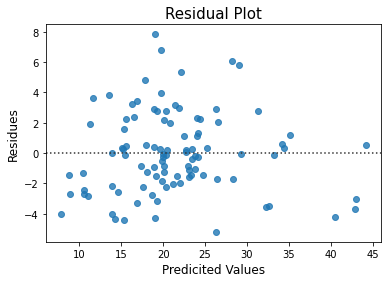

In [136]:
sns.residplot(y_pred, (y_pred - y_test))
plt.xlabel('Predicited Values',size=12)
plt.ylabel("Residues",size=12)
plt.title('Residual Plot',size=15)
plt.show()

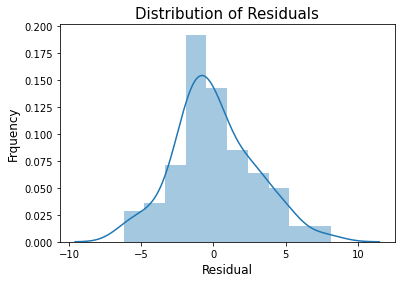

In [142]:
sns.distplot(y_pred - y_test)
plt.xlabel('Residual',size=12)
plt.ylabel('Frquency',size=12)
plt.title('Distribution of Residuals',size=15)
plt.show()

**Observations:**
- *Distribution of Residuals Plot* shows residuals are normally distributed.


- From above *Residual Plot*, I do not found any significant pattern in residues (errors or predicition).


- I can conclude that our model is neither under fitting nor over fitting the data.